<a name = "content"> </a>
# **Лабораторная работа №3**

## Брысов Александр
### М8О-409Б-18
----

### [1. Задание](#step1)

### [2. Необходимые функции](#step2)

### [3. Аналитическое решение](#step3)

### [4. Метод Либмана](#step4)

### [5. Метод Зейделя](#step5)

### [6. Метод верхних релаксаций](#step6)

<a name = "step1"></a>
# Задание
[К началу](#content)

Решить краевую задачу для дифференциального уравнения эллиптического типа. Аппроксимацию уравнения произвести с использованием центрально-разностной схемы. Для решения дискретного аналога применить следующие методы: метод простых итераций (метод Либмана), метод Зейделя, метод простых итераций с верхней релаксацией. Вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,y)$. Исследовать зависимость погрешености от сеточных параметров $h_x, h_y$

Краевая задача для дифференциального уравнения эллиптического типа:

$$\begin{aligned} 
&\frac{\partial^2u}{\partial x^2} + \frac{\partial^2u}{\partial y^2} = -2\frac{\partial u}{\partial x} -2\frac{\partial u}{\partial y} - 4u\\ 
&u(0,y) = \exp(-y)\cos y\\
&u\left(\frac{\pi}{2}, y\right) = 0\\
&u(x,0) = \exp(-x)\cos x\\
&u\left(x,\frac{\pi}{2}\right) = 0\end{aligned}$$

Аналитическое решение: $U(x,y) = \exp(-x - y) \cos x \cos y$

<a name = "step2"></a>
# Необходимые функции

[К началу](#content)

In [38]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('dark_background')
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

In [31]:
def border_con_0y(y):
    return np.exp(-y)*np.cos(y)
def border_con_ly(y):
    return 0
def border_con_x0(x):
    return np.exp(-x)*np.cos(x)
def border_con_xl(x):
    return 0
def analytic(x,y):
    return np.exp(-x-y)*np.cos(x)*np.cos(y)

In [53]:
def error_norm(U):
    x1, y1 = np.mgrid[0:np.pi/2:60j, 0:np.pi/2:60j]
    z1 = np.exp(-x1-y1)*np.cos(x1)*np.cos(y1)
    X = np.linspace(0, np.pi/2, 60)
    Y = []
    for t in range(60):
        Y.append(np.max(np.abs(U[t]-z1[t])))
    fig = plt.figure(figsize=(10, 5))
    plt.plot(X, Y, color = 'red')
    plt.xlabel('y')
    plt.ylabel('Error')
    plt.title(r'$\max_{t} \left|u_{approx} - u_{analytic}\right|$', fontsize = 20)
    plt.show()

In [33]:
def fill_border_con(x_con, y_con, K, N, hx, hy, ly): 
    ux0, uxl = x_con
    u0y, uly = y_con
    
    xlCond, xrCond = (0, K)
    tlCond, trCond = (0, N)
    U = np.zeros((xrCond, trCond))

    for i in range(0, K):
        U[i][0] = ux0(hx * i)
        U[i][N-1] = uxl(hx * i)

    for j in range(0, N):
        U[0][j] = u0y(hy * j)
        U[K-1][j] = uly(hy * j)

    for i in range(1, K - 1):
        for j in range(1, N - 1):
            alpha = (j * hy) / ly
            U[i][j] = ux0(i * hx)*(1 - alpha) + uxl(i * hx) * alpha
    return U

<a name = "step3"></a>
# Аналитическое решение

[К началу](#content)

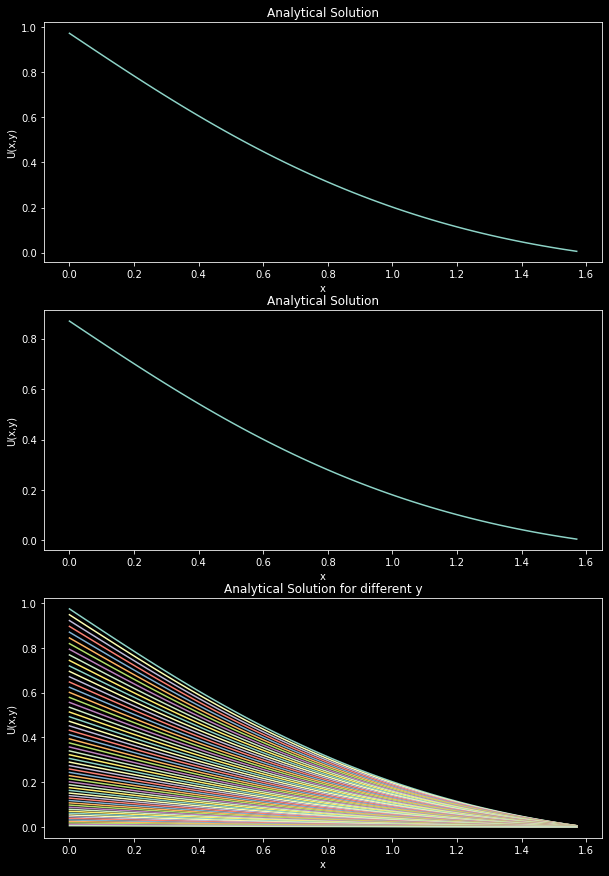

In [35]:
lx = np.pi/2
ly = np.pi/2
K = 60
N = 60

hx = lx / K
hy = ly / N

u_anlt = np.zeros((K,N))
X = np.linspace(0, lx, K)

for k in range(K):
    for j in range(N):
        u_anlt[k][j] = analytic(j * hx, k * hy)

fig = plt.figure(figsize=(10, 15))
plt.subplot(3,1,1)
plt.xlabel('x')
plt.ylabel('U(x,y)')
plt.title(f'Analytical Solution')
plt.plot(X, u_anlt[1])
plt.subplot(3,1,2)
plt.xlabel('x')
plt.ylabel('U(x,y)')
plt.title(f'Analytical Solution')
plt.plot(X, u_anlt[5])
plt.subplot(3,1,3)
plt.xlabel('x')
plt.ylabel('U(x,y)')
plt.title('Analytical Solution for different y')
for k in range(1, len(u_anlt)):
    plt.plot(X,u_anlt[k])

<a name = "step4"></a>
# Метод Либмана

[К началу](#content)

In [9]:
def Libman(U, epsil):
    n = 0
    errors = []
    while True:
        n += 1
        Uold = U.copy()
        for i in range(1, K - 1):
            for j in range(1, N - 1):
                U[i][j] = delta * ((hhx + ahx) * Uold[i - 1][j] +
                                    (hhx - ahx) * Uold[i + 1][j] +
                                    (hhy + bhy) * Uold[i][j - 1] +
                                    (hhy - bhy) * Uold[i][j + 1])
        err = np.max(np.abs(Uold - U))
        errors.append(err)
        if (err < epsil):
            break
    #print("iter - ", n)
    return U, errors

In [46]:
a = -2
b = -2
c = -4
lx = np.pi/2
ly = np.pi/2
omega = 1.5
K = 60
N = 60
epsil = 0.0001
hx = lx / K
hy = ly / N

delta = 1/(2/hx**2 + 2/hy**2 + c)
hhx = 1/hx**2
ahx = a/2/hx
hhy = 1/hy**2
bhy = b/2/hy
err = []

In [47]:
U = fill_border_con((border_con_x0, border_con_xl), (border_con_0y, border_con_ly), K, N, hx, hy, ly)
u_lib, err = Libman(U, epsil)

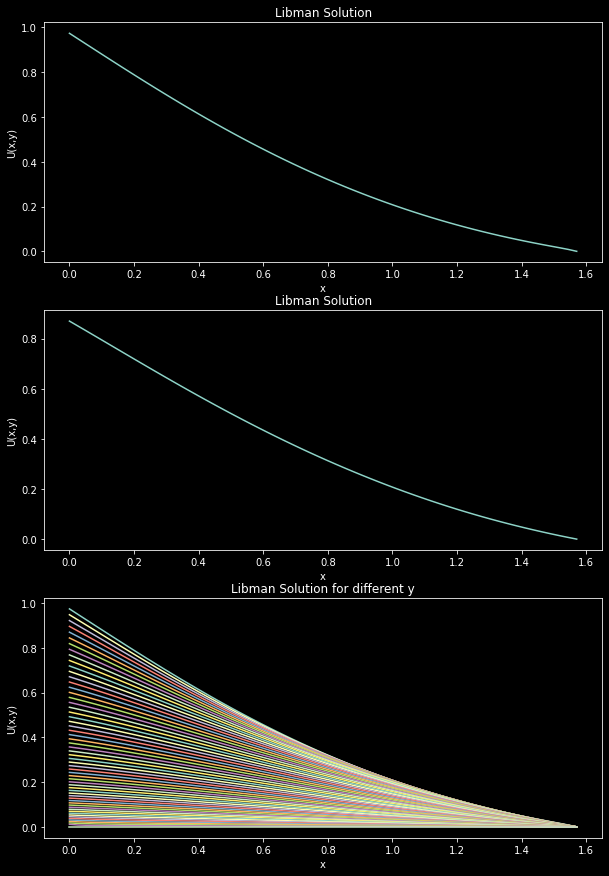

In [48]:
fig = plt.figure(figsize=(10, 15))
X = np.linspace(0, lx, K)
plt.subplot(3,1,1)
plt.xlabel('x')
plt.ylabel('U(x,y)')
plt.title(f'Libman Solution')
plt.plot(X, u_lib[1])
plt.subplot(3,1,2)
plt.xlabel('x')
plt.ylabel('U(x,y)')
plt.title(f'Libman Solution')
plt.plot(X, u_lib[5])
plt.subplot(3,1,3)
plt.xlabel('x')
plt.ylabel('U(x,y)')
plt.title('Libman Solution for different y')
for k in range(1, len(u_lib)):
    plt.plot(X,u_lib[k])

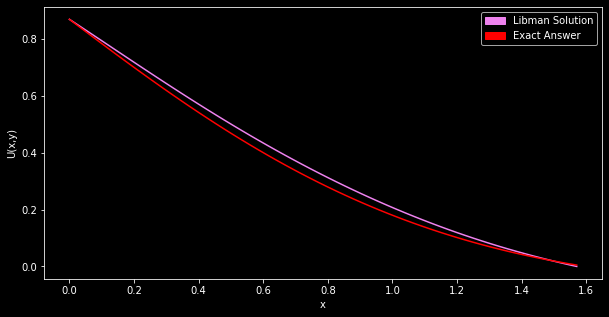

In [54]:
fig = plt.figure(figsize=(10, 5))
#plt.subplot(1,3,1)
plt.xlabel('x')
plt.ylabel('U(x,y)')
a_ = mpatches.Patch(color = 'violet', label = 'Libman Solution')
b_ = mpatches.Patch(color = 'red', label = 'Exact Answer')
plt.legend(handles=[a_,b_])
plt.plot(X, u_lib[5], color = 'violet')
plt.plot(X,u_anlt[5], color = 'red')

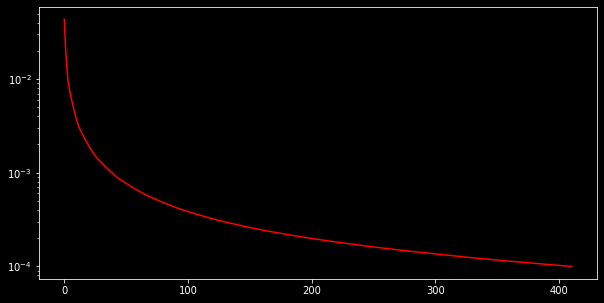

In [58]:
fig = plt.figure(figsize=(10, 5))
plt.semilogy(err, color = 'Red')
plt.show()

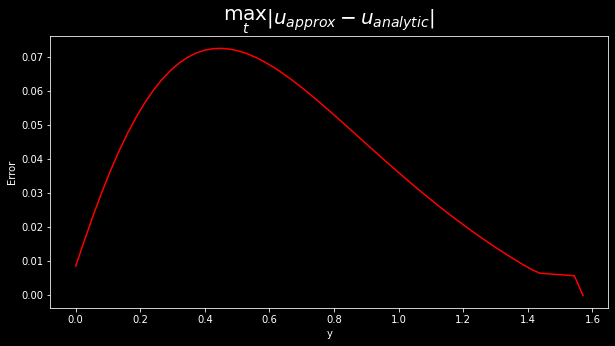

In [55]:
error_norm(u_lib)

<a name = "step5"></a>
# Метод Зейделя

[К началу](#content)

In [63]:
def Seidel(U, epsil):
  n = 0
  errors = []
  while True:
      n += 1
      Uold = U.copy()
      for i in range(1, K - 1):
          for j in range(1, N - 1):
              U[i][j] = delta * ((hhx + ahx) * U[i - 1][j] +
                                  (hhx - ahx) * U[i + 1][j] +
                                  (hhy + bhy) * U[i][j - 1] +
                                  (hhy - bhy) * U[i][j + 1])
      err = np.max(np.abs(Uold - U))
      errors.append(err)
      if (err < epsil):
          break
  #print("iter - ", n)
  return U, errors

In [60]:
a = -2
b = -2
c = -4
lx = np.pi/2
ly = np.pi/2
omega = 1.5
K = 60
N = 60
epsil = 0.0001
hx = lx / K
hy = ly / N

delta = 1/(2/hx**2 + 2/hy**2 + c)
hhx = 1/hx**2
ahx = a/2/hx
hhy = 1/hy**2
bhy = b/2/hy
err = []

In [64]:
U = fill_border_con((border_con_x0, border_con_xl), (border_con_0y, border_con_ly), K, N, hx, hy, ly)
u_sdl, err = Seidel(U, epsil)

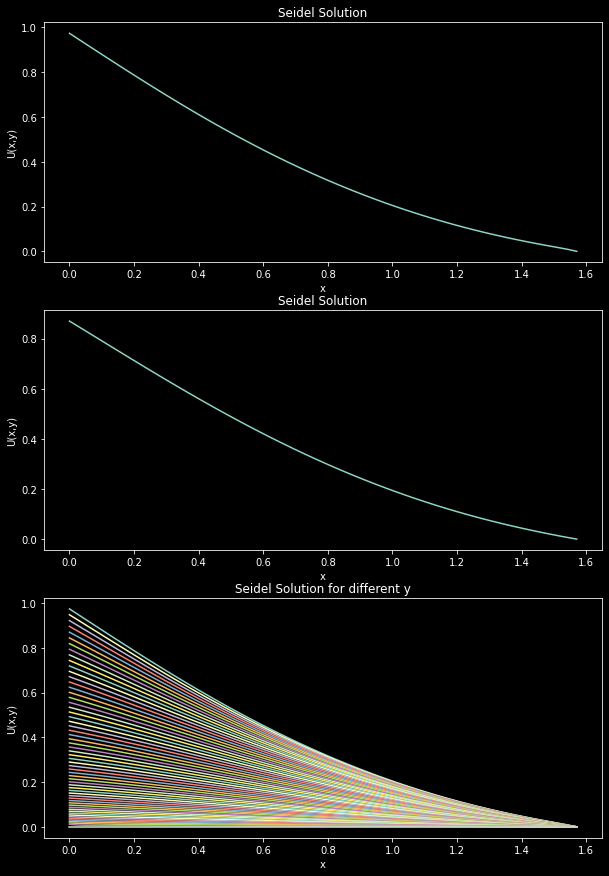

In [65]:
fig = plt.figure(figsize=(10, 15))
X = np.linspace(0, lx, K)
plt.subplot(3,1,1)
plt.xlabel('x')
plt.ylabel('U(x,y)')
plt.title(f'Seidel Solution')
plt.plot(X, u_sdl[1])
plt.subplot(3,1,2)
plt.xlabel('x')
plt.ylabel('U(x,y)')
plt.title(f'Seidel Solution')
plt.plot(X, u_sdl[5])
plt.subplot(3,1,3)
plt.xlabel('x')
plt.ylabel('U(x,y)')
plt.title('Seidel Solution for different y')
for k in range(1, len(u_sdl)):
    plt.plot(X,u_sdl[k])

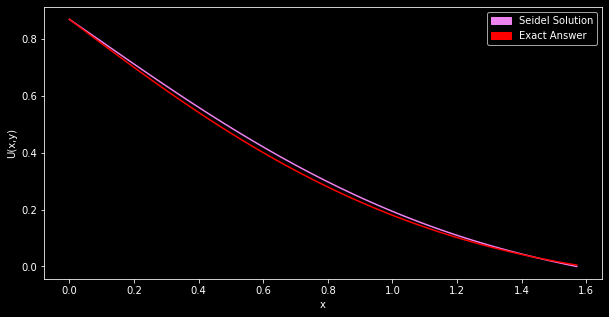

In [66]:
fig = plt.figure(figsize=(10, 5))
#plt.subplot(1,3,1)
plt.xlabel('x')
plt.ylabel('U(x,y)')
a_ = mpatches.Patch(color = 'violet', label = 'Seidel Solution')
b_ = mpatches.Patch(color = 'red', label = 'Exact Answer')
plt.legend(handles=[a_,b_])
plt.plot(X, u_sdl[5], color = 'violet')
plt.plot(X,u_anlt[5], color = 'red')

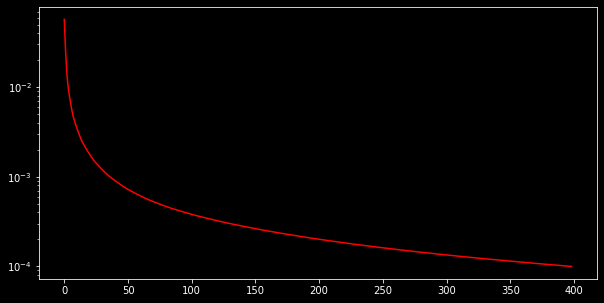

In [67]:
fig = plt.figure(figsize=(10, 5))
plt.semilogy(err, color = 'Red')
plt.show()

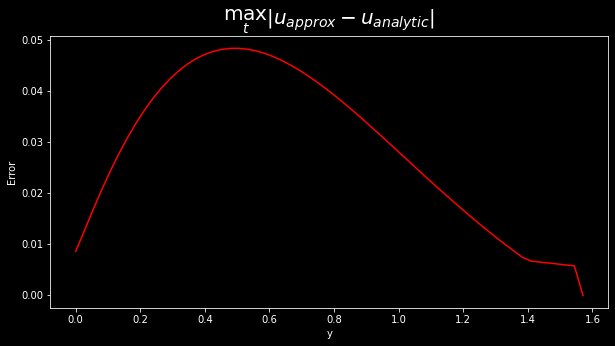

In [68]:
error_norm(u_sdl)

<a name = "step6"></a>
# Метод верхних релаксаций

[К началу](#content)

In [72]:
def upperRelaxation(U, epsil, omega):
    n = 0
    good = False
    errors = []
    while (n < 1000):
        n += 1
        Uold = U.copy()
        for i in range(1, K - 1):
            for j in range(1, N - 1):
                U[i][j] = U[i][j] + omega * (delta * ((hhx + ahx) * U[i - 1][j] +
                                    (hhx - ahx) * Uold[i + 1][j] +
                                    (hhy + bhy) * U[i][j - 1] +
                                    (hhy - bhy) * Uold[i][j + 1]) - U[i][j])
        err = np.max(np.abs(Uold - U))
        errors.append(err)
        if (err < epsil):
            good = True
            break
    if (not good):
        print("Расходится!!!")
    #print("iter - ", n)
    return U, errors

In [70]:
a = -2
b = -2
c = -4
lx = np.pi/2
ly = np.pi/2
omega = 1.5
K = 60
N = 60
epsil = 0.0001
hx = lx / K
hy = ly / N

delta = 1/(2/hx**2 + 2/hy**2 + c)
hhx = 1/hx**2
ahx = a/2/hx
hhy = 1/hy**2
bhy = b/2/hy
err = []

In [73]:
U = fill_border_con((border_con_x0, border_con_xl), (border_con_0y, border_con_ly), K, N, hx, hy, ly)
u_rlx, err = upperRelaxation(U, epsil, omega)

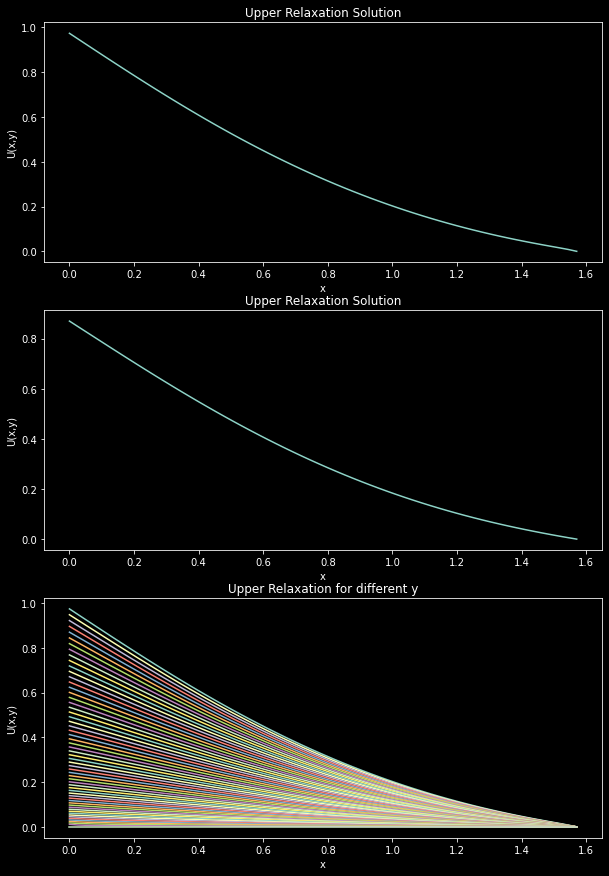

In [74]:
fig = plt.figure(figsize=(10, 15))
X = np.linspace(0, lx, K)
plt.subplot(3,1,1)
plt.xlabel('x')
plt.ylabel('U(x,y)')
plt.title(f'Upper Relaxation Solution')
plt.plot(X, u_rlx[1])
plt.subplot(3,1,2)
plt.xlabel('x')
plt.ylabel('U(x,y)')
plt.title(f'Upper Relaxation Solution')
plt.plot(X, u_rlx[5])
plt.subplot(3,1,3)
plt.xlabel('x')
plt.ylabel('U(x,y)')
plt.title('Upper Relaxation for different y')
for k in range(1, len(u_rlx)):
    plt.plot(X,u_rlx[k])

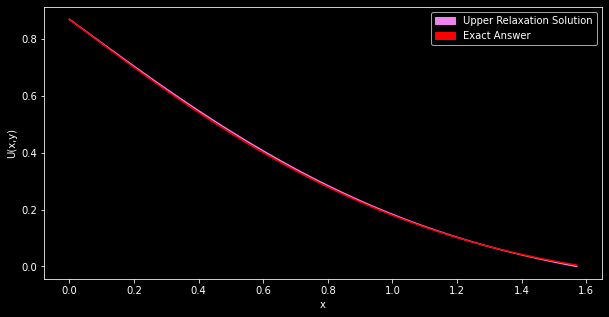

In [75]:
fig = plt.figure(figsize=(10, 5))
#plt.subplot(1,3,1)
plt.xlabel('x')
plt.ylabel('U(x,y)')
a_ = mpatches.Patch(color = 'violet', label = 'Upper Relaxation Solution')
b_ = mpatches.Patch(color = 'red', label = 'Exact Answer')
plt.legend(handles=[a_,b_])
plt.plot(X, u_rlx[5], color = 'violet')
plt.plot(X,u_anlt[5], color = 'red')

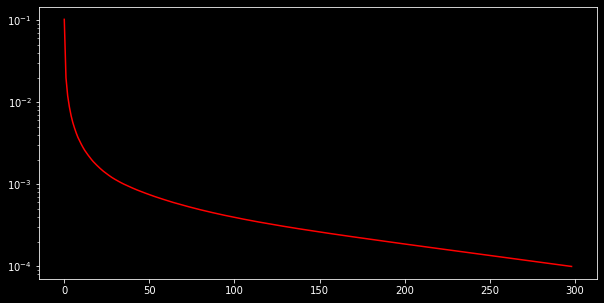

In [76]:
fig = plt.figure(figsize=(10, 5))
plt.semilogy(err, color = 'Red')
plt.show()

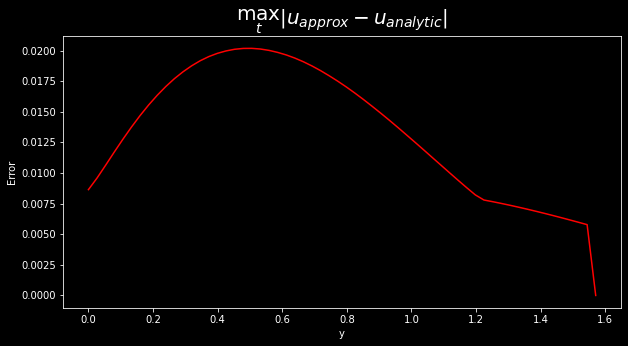

In [78]:
error_norm(u_rlx)